In [1]:
%matplotlib inline

In [4]:
import numpy as np
import pycuda.compiler as cuda_compiler
from pycuda.gpuarray import GPUArray
import pycuda.driver as cuda_driver

In [5]:
from matplotlib import pyplot as plt

In [6]:
cuda_driver.init()

In [7]:
cuda_device = cuda_driver.Device(0)

In [9]:
print("Using {:s}".format(cuda_device.name() ))

Using Tesla P100-PCIE-12GB


# My first GPU program
I will not find $\pi$ today.

In [11]:
context = cuda_device.make_context()

In [12]:
free, total = cuda_driver.mem_get_info()
print("Memory is {:d} / {:d}".format(free, total))

Memory is 11980374016 / 12790923264


In [17]:
cuda_kernel = """
__global__ void addKernel(float* c, float* a, float* b) {
    int k = blockIdx.x*blockDim.x + threadIdx.x;
    c[k] = a[k] + b[k];
}
"""

In [18]:
module = cuda_compiler.SourceModule(cuda_kernel)
kernel = module.get_function("addKernel")

In [21]:
n = 50
a = np.random.rand(n).astype(np.float32)
b = np.random.rand(n).astype(np.float32)
c = np.empty_like(a)

In [22]:
a_gpu = GPUArray(a.shape, np.float32)
a_gpu.set(a)

In [23]:
b_gpu = GPUArray(b.shape, np.float32)
b_gpu.set(b)

In [24]:
c_gpu = GPUArray(c.shape, np.float32)

In [25]:
kernel(c_gpu, a_gpu, b_gpu, block=(n, 1, 1), grid=(1,1,1))

In [26]:
c_gpu.get(c)

array([0.3413515 , 0.40786475, 0.47239518, 1.2834085 , 0.63041997,
       1.3653789 , 1.0909423 , 1.289975  , 0.6774886 , 0.8588202 ,
       1.1895043 , 1.0908209 , 0.43083465, 0.69301724, 0.20200731,
       0.60191673, 0.2930723 , 1.6067288 , 0.9941799 , 1.5712228 ,
       1.1980371 , 1.5940545 , 1.652323  , 0.3536693 , 1.0304096 ,
       0.45323846, 0.77992946, 1.3082211 , 0.7099117 , 1.7225246 ,
       1.5245323 , 0.5284028 , 1.7836283 , 1.5086452 , 1.5064766 ,
       0.52836347, 1.1000174 , 1.0182922 , 1.359402  , 1.7080137 ,
       1.6668491 , 0.80925786, 0.7628979 , 1.2726548 , 1.2451205 ,
       1.5797842 , 0.8617011 , 0.68784285, 0.6141697 , 0.48262984],
      dtype=float32)

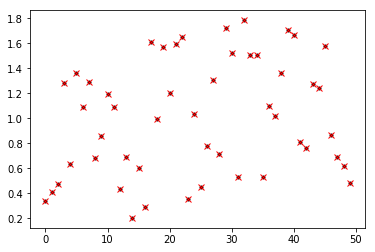

In [27]:
plt.plot(a+b, 'k.')
plt.plot(c, 'rx')